# Sistema de Inferência Mamdani - Sistema de Gorjeta

## 📚 Introdução

Bem-vindo ao tutorial do **Método de Mamdani**!

O método de **Mamdani** (desenvolvido por Ebrahim Mamdani em 1974) é o sistema de inferência fuzzy mais intuitivo e amplamente utilizado.

### 📊 As 5 Etapas do Mamdani

1. **Fuzzificação**: Converter valores numéricos em graus de pertinência
2. **Aplicação das Regras**: Avaliar as regras fuzzy (SE-ENTÃO)
3. **Implicação**: "Cortar" os conjuntos fuzzy de saída
4. **Agregação**: Combinar todas as saídas fuzzy
5. **Defuzzificação**: Converter resultado fuzzy em valor numérico

### 💡 Exemplo Clássico: Sistema de Gorjeta

Vamos criar um sistema que calcula a gorjeta em um restaurante baseado em:
- **Entradas**: Qualidade do serviço (0-10) e Qualidade da comida (0-10)
- **Saída**: Porcentagem de gorjeta (0-25%)

---

## 🔧 Instalação e Importações

In [ ]:
# Instalar pyfuzzy-toolbox
!pip install pyfuzzy-toolbox -q

print("✅ pyfuzzy-toolbox instalado com sucesso!")

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Importar pyfuzzy-toolbox
import fuzzy_systems as fs
from fuzzy_systems import MamdaniSystem

# Configurar matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 100

print("✅ Bibliotecas importadas com sucesso!")
print(f"   Versão do NumPy: {np.__version__}")
print(f"   pyfuzzy-toolbox: {fs.__version__}")

✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas com sucesso!
   Versão do NumPy: 2.2.6
   pyfuzzy-toolbox: 1.0.1


## Passo 1: Definir Variáveis Linguísticas

Vamos criar um sistema Mamdani usando a biblioteca pyfuzzy-toolbox.

In [2]:
# ============================================================================
# Criar Sistema Mamdani
# ============================================================================

sistema = MamdaniSystem()

# ============================================================================
# ENTRADA 1: Qualidade do Serviço (0 a 10)
# ============================================================================

sistema.add_input('servico', (0, 10))

# Definir termos linguísticos com funções de pertinência
sistema.add_term('servico', 'ruim', 'triangular', (0, 0, 5))
sistema.add_term('servico', 'aceitavel', 'triangular', (0, 5, 10))
sistema.add_term('servico', 'excelente', 'triangular', (5, 10, 10))

# ============================================================================
# ENTRADA 2: Qualidade da Comida (0 a 10)
# ============================================================================

sistema.add_input('comida', (0, 10))

sistema.add_term('comida', 'ruim', 'trapezoidal', (0, 0, 3, 5))
sistema.add_term('comida', 'aceitavel', 'triangular', (3, 5, 7))
sistema.add_term('comida', 'deliciosa', 'trapezoidal', (5, 7, 10, 10))

# ============================================================================
# SAÍDA: Porcentagem de Gorjeta (0 a 25%)
# ============================================================================

sistema.add_output('gorjeta', (0, 25))

sistema.add_term('gorjeta', 'baixa', 'triangular', (0, 0, 13))
sistema.add_term('gorjeta', 'media', 'triangular', (0, 13, 25))
sistema.add_term('gorjeta', 'alta', 'triangular', (13, 25, 25))

print("✅ Variáveis linguísticas criadas!")
print("   • Serviço: ruim, aceitavel, excelente")
print("   • Comida: ruim, aceitavel, deliciosa")
print("   • Gorjeta: baixa, media, alta")

✅ Variáveis linguísticas criadas!
   • Serviço: ruim, aceitavel, excelente
   • Comida: ruim, aceitavel, deliciosa
   • Gorjeta: baixa, media, alta


## Visualizar Funções de Pertinência

A biblioteca pyfuzzy-toolbox possui métodos integrados de visualização!

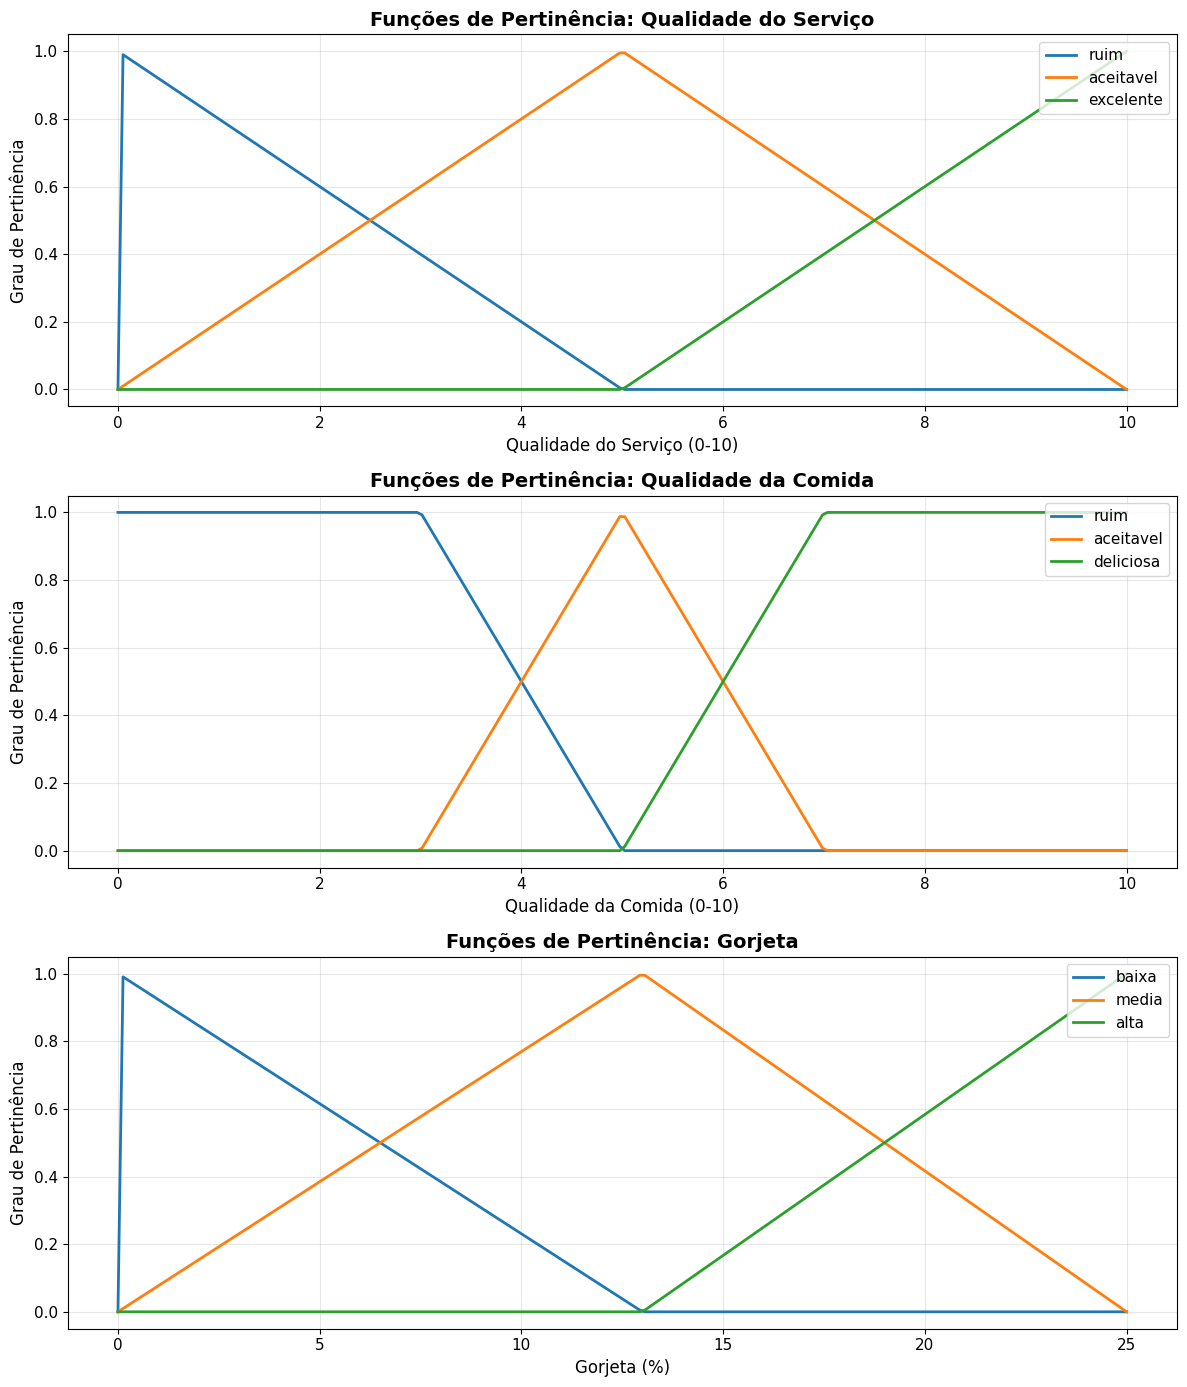

✅ Funções de pertinência visualizadas!


In [3]:
# Criar figura com 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# ============================================================================
# Subplot 1: Qualidade do Serviço
# ============================================================================
x_servico = np.linspace(0, 10, 200)
for term_name, term in sistema.input_variables['servico'].terms.items():
    mu = term.membership(x_servico)
    axes[0].plot(x_servico, mu, label=term_name, linewidth=2)

axes[0].set_title('Funções de Pertinência: Qualidade do Serviço', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Qualidade do Serviço (0-10)', fontsize=12)
axes[0].set_ylabel('Grau de Pertinência', fontsize=12)
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([-0.05, 1.05])

# ============================================================================
# Subplot 2: Qualidade da Comida
# ============================================================================
x_comida = np.linspace(0, 10, 200)
for term_name, term in sistema.input_variables['comida'].terms.items():
    mu = term.membership(x_comida)
    axes[1].plot(x_comida, mu, label=term_name, linewidth=2)

axes[1].set_title('Funções de Pertinência: Qualidade da Comida', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Qualidade da Comida (0-10)', fontsize=12)
axes[1].set_ylabel('Grau de Pertinência', fontsize=12)
axes[1].legend(loc='upper right', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([-0.05, 1.05])

# ============================================================================
# Subplot 3: Gorjeta
# ============================================================================
x_gorjeta = np.linspace(0, 25, 200)
for term_name, term in sistema.output_variables['gorjeta'].terms.items():
    mu = term.membership(x_gorjeta)
    axes[2].plot(x_gorjeta, mu, label=term_name, linewidth=2)

axes[2].set_title('Funções de Pertinência: Gorjeta', 
                 fontsize=14, fontweight='bold')
axes[2].set_xlabel('Gorjeta (%)', fontsize=12)
axes[2].set_ylabel('Grau de Pertinência', fontsize=12)
axes[2].legend(loc='upper right', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

print("✅ Funções de pertinência visualizadas!")

## Passo 2: Definir Base de Regras Fuzzy

As regras fuzzy seguem a estrutura: **SE (antecedente) ENTÃO (consequente)**

### 📜 Nossa Base de Regras

1. **SE** serviço é ruim **OU** comida é ruim **ENTÃO** gorjeta é baixa
2. **SE** serviço é aceitável **ENTÃO** gorjeta é média
3. **SE** serviço é excelente **OU** comida é deliciosa **ENTÃO** gorjeta é alta

In [ ]:
# ============================================================================
# Definir Regras Fuzzy usando pyfuzzy-toolbox
# ============================================================================

# Base de regras mais completa e realista
sistema.add_rules([
    # Ambos ruins → gorjeta baixa
    {'servico': 'ruim', 'comida': 'ruim', 'gorjeta': 'baixa', 'operator': 'AND'},
    
    # Pelo menos um ruim → gorjeta baixa
    {'servico': 'ruim', 'comida': 'aceitavel', 'gorjeta': 'baixa'},
    {'servico': 'aceitavel', 'comida': 'ruim', 'gorjeta': 'baixa'},
    
    # Ambos aceitáveis → gorjeta média
    {'servico': 'aceitavel', 'comida': 'aceitavel', 'gorjeta': 'media', 'operator': 'AND'},
    
    # Pelo menos um excelente → gorjeta alta
    {'servico': 'excelente', 'comida': 'aceitavel', 'gorjeta': 'alta'},
    {'servico': 'aceitavel', 'comida': 'deliciosa', 'gorjeta': 'alta'},
    
    # Ambos excelentes → gorjeta alta
    {'servico': 'excelente', 'comida': 'deliciosa', 'gorjeta': 'alta', 'operator': 'OR'}
])


print("✅ Base de regras fuzzy criada!")
print("\n📜 Regras definidas:")
print("   1. SE serviço é RUIM OU comida é RUIM → gorjeta é BAIXA")
print("   2. SE serviço é ACEITÁVEL → gorjeta é MÉDIA")
print("   3. SE serviço é EXCELENTE OU comida é DELICIOSA → gorjeta é ALTA")
print(f"\n   Total de regras: {len(sistema.rule_base)}")

✅ Base de regras fuzzy criada!

📜 Regras definidas:
   1. SE serviço é RUIM OU comida é RUIM → gorjeta é BAIXA
   2. SE serviço é ACEITÁVEL → gorjeta é MÉDIA
   3. SE serviço é EXCELENTE OU comida é DELICIOSA → gorjeta é ALTA

   Total de regras: 3


## Passo 3: Testar o Sistema com Entradas Específicas

Vamos testar diferentes cenários de restaurante!

In [7]:
# ============================================================================
# Testar Vários Cenários
# ============================================================================

print("="*80)
print("🧪 TESTANDO SISTEMA DE GORJETA FUZZY")
print("="*80)
print()

# Casos de teste
casos = [
    (2, 2, "Péssima experiência: serviço e comida ruins"),
    (5, 5, "Experiência mediana: tudo aceitável"),
    (9, 9, "Excelente experiência: tudo perfeito!"),
    (2, 9, "Serviço ruim, mas comida excelente"),
    (9, 2, "Serviço excelente, mas comida ruim"),
    (6.5, 8, "Serviço bom e comida ótima"),
]

print(f"{'Serviço':<10} {'Comida':<10} {'Gorjeta':<12} {'Cenário'}")
print("-" * 80)

for servico_val, comida_val, descricao in casos:
    # Avaliar sistema
    resultado = sistema.evaluate([servico_val,comida_val])

    # resultado = sistema.evaluate({
    #     'servico': servico_val,
    #     'comida': comida_val
    # })
    
    gorjeta_calc = resultado['gorjeta']
    
    print(f"{servico_val:<10.1f} {comida_val:<10.1f} {gorjeta_calc:<12.2f} {descricao}")

print("\n" + "="*80)
print("✅ Testes concluídos!")
print("\n💡 Observe como o sistema trata diferentes combinações de entradas.")

🧪 TESTANDO SISTEMA DE GORJETA FUZZY

Serviço    Comida     Gorjeta      Cenário
--------------------------------------------------------------------------------
2.0        2.0        9.56         Péssima experiência: serviço e comida ruins
5.0        5.0        12.67        Experiência mediana: tudo aceitável
9.0        9.0        17.01        Excelente experiência: tudo perfeito!
2.0        9.0        13.24        Serviço ruim, mas comida excelente
9.0        2.0        12.15        Serviço excelente, mas comida ruim
6.5        8.0        14.80        Serviço bom e comida ótima

✅ Testes concluídos!

💡 Observe como o sistema trata diferentes combinações de entradas.


## Visualizar Processo de Inferência

Vamos ver visualmente o que acontece **dentro** do sistema fuzzy!

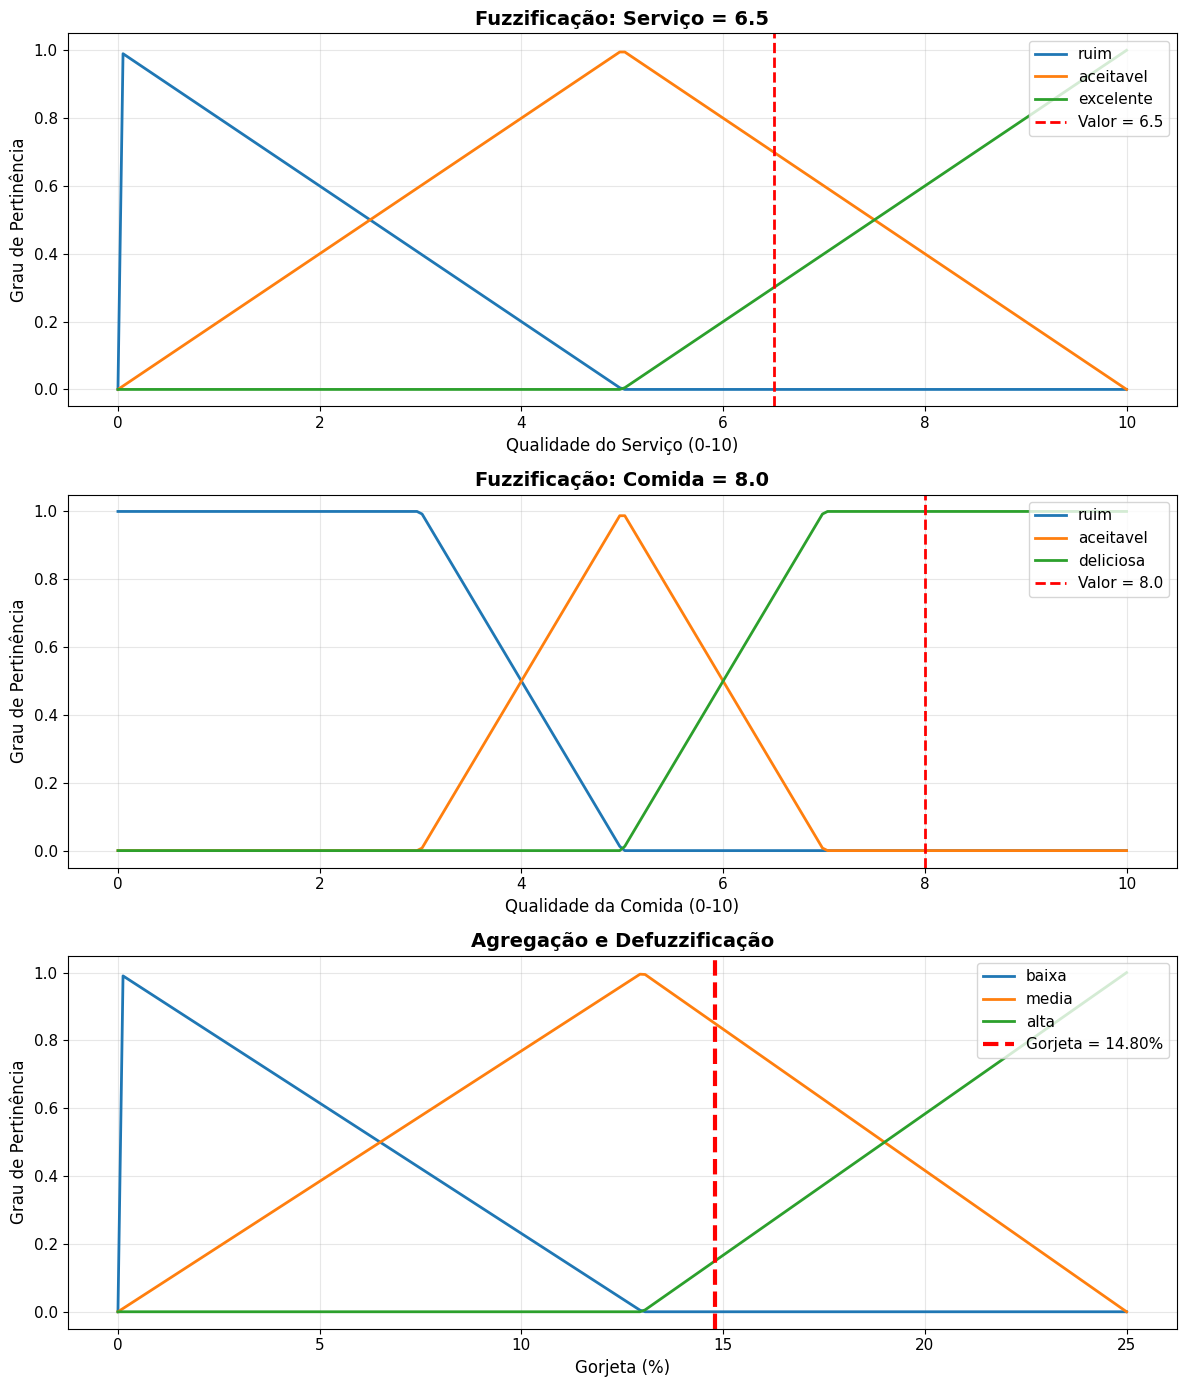


📊 RESULTADO DA INFERÊNCIA

   Entradas:
   • Serviço: 6.5/10
   • Comida: 8.0/10

   Saída:
   • Gorjeta: 14.80%

   Interpretação:
   → Gorjeta MÉDIA - Experiência aceitável


In [8]:
# ============================================================================
# Visualizar Exemplo Específico: Serviço = 6.5, Comida = 8
# ============================================================================

servico_exemplo = 6.5
comida_exemplo = 8.0

# Calcular
# resultado = sistema.evaluate_detailed([servico_exemplo, comida_exemplo])
resultado = sistema.evaluate_detailed({'servico':servico_exemplo, 'comida':comida_exemplo})

gorjeta_exemplo = resultado['outputs']['gorjeta']

# Visualizar cada variável com o valor marcado
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# ============================================================================
# Subplot 1: Serviço
# ============================================================================
x_servico = np.linspace(0, 10, 200)
for term_name, term in sistema.input_variables['servico'].terms.items():
    mu = term.membership(x_servico)
    axes[0].plot(x_servico, mu, label=term_name, linewidth=2)

axes[0].axvline(x=servico_exemplo, color='red', linestyle='--', linewidth=2, 
                label=f'Valor = {servico_exemplo}')
axes[0].set_title(f'Fuzzificação: Serviço = {servico_exemplo}', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Qualidade do Serviço (0-10)', fontsize=12)
axes[0].set_ylabel('Grau de Pertinência', fontsize=12)
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([-0.05, 1.05])

# ============================================================================
# Subplot 2: Comida
# ============================================================================
x_comida = np.linspace(0, 10, 200)
for term_name, term in sistema.input_variables['comida'].terms.items():
    mu = term.membership(x_comida)
    axes[1].plot(x_comida, mu, label=term_name, linewidth=2)

axes[1].axvline(x=comida_exemplo, color='red', linestyle='--', linewidth=2,
                label=f'Valor = {comida_exemplo}')
axes[1].set_title(f'Fuzzificação: Comida = {comida_exemplo}', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Qualidade da Comida (0-10)', fontsize=12)
axes[1].set_ylabel('Grau de Pertinência', fontsize=12)
axes[1].legend(loc='upper right', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([-0.05, 1.05])

# ============================================================================
# Subplot 3: Gorjeta (saída agregada e defuzzificada)
# ============================================================================
x_gorjeta = np.linspace(0, 25, 200)
for term_name, term in sistema.output_variables['gorjeta'].terms.items():
    mu = term.membership(x_gorjeta)
    axes[2].plot(x_gorjeta, mu, label=term_name, linewidth=2)

axes[2].axvline(x=gorjeta_exemplo, color='red', linestyle='--', linewidth=3,
                label=f'Gorjeta = {gorjeta_exemplo:.2f}%')
axes[2].set_title('Agregação e Defuzzificação', 
                 fontsize=14, fontweight='bold')
axes[2].set_xlabel('Gorjeta (%)', fontsize=12)
axes[2].set_ylabel('Grau de Pertinência', fontsize=12)
axes[2].legend(loc='upper right', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(f"📊 RESULTADO DA INFERÊNCIA")
print("="*80)
print(f"\n   Entradas:")
print(f"   • Serviço: {servico_exemplo}/10")
print(f"   • Comida: {comida_exemplo}/10")
print(f"\n   Saída:")
print(f"   • Gorjeta: {gorjeta_exemplo:.2f}%")
print(f"\n   Interpretação:")
if gorjeta_exemplo < 10:
    print("   → Gorjeta BAIXA - Experiência insatisfatória")
elif gorjeta_exemplo < 18:
    print("   → Gorjeta MÉDIA - Experiência aceitável")
else:
    print("   → Gorjeta ALTA - Experiência excelente")
print("="*80)

## Superfície de Controle 3D

A **superfície de controle** mostra como a saída varia em função de todas as combinações de entrada.

É uma visualização poderosa para entender o comportamento global do sistema!

🔄 Calculando superfície de controle... (isso pode levar alguns segundos)


/var/folders/z6/n6t25pkx2nl6t75_c5d0rm0h0000gn/T/ipykernel_27681/1284769565.py:63: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/z6/n6t25pkx2nl6t75_c5d0rm0h0000gn/T/ipykernel_27681/1284769565.py:63: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/1moi6/ambientes/generico/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/1moi6/ambientes/generico/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


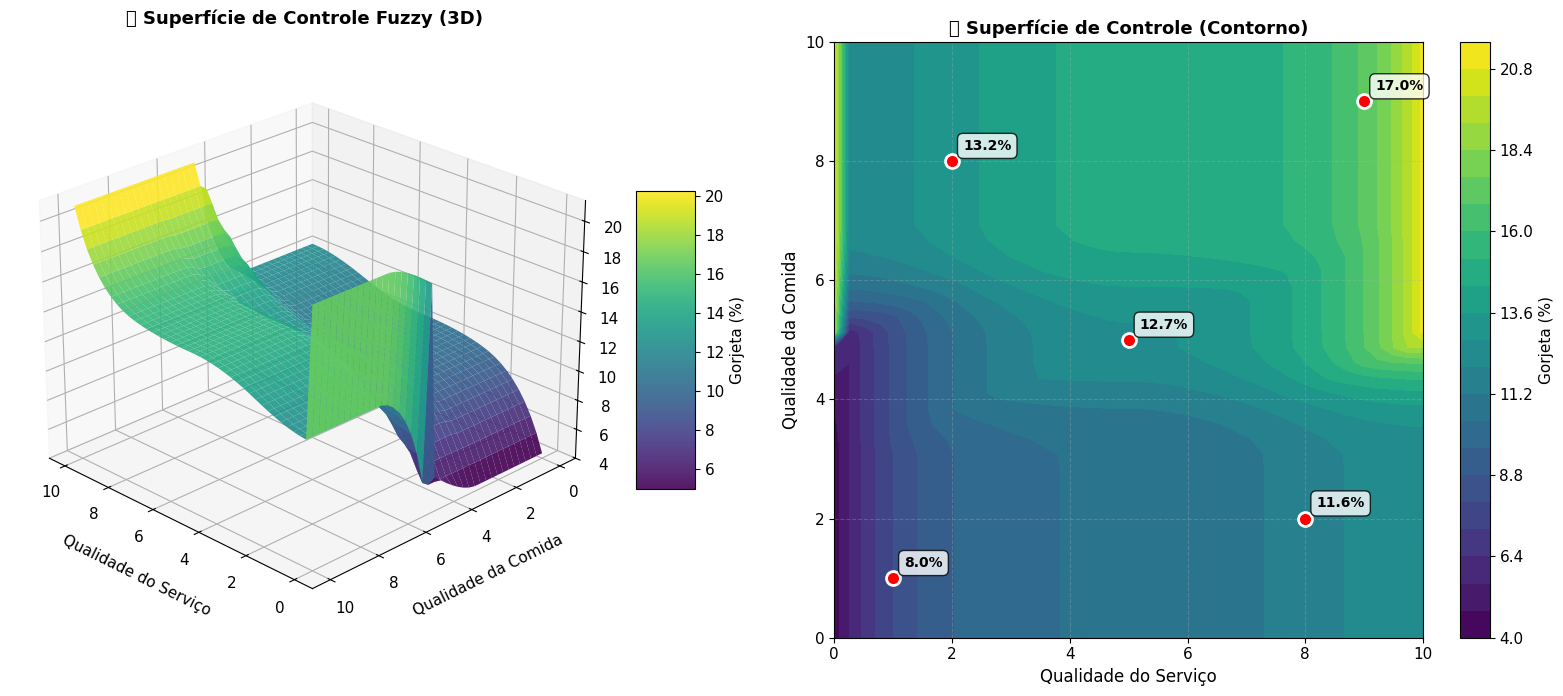


✅ Superfície de controle gerada!

💡 Análise da superfície:
   • Cores escuras = gorjeta baixa
   • Cores claras = gorjeta alta
   • A transição é suave (característica do fuzzy!)
   • Pontos vermelhos = exemplos testados anteriormente


In [9]:
# ============================================================================
# Criar Superfície de Controle 3D
# ============================================================================

print("🔄 Calculando superfície de controle... (isso pode levar alguns segundos)")

# Criar grid de valores
servico_range = np.linspace(0, 10, 40)
comida_range = np.linspace(0, 10, 40)
SERVICO, COMIDA = np.meshgrid(servico_range, comida_range)

# Calcular gorjeta para cada ponto
GORJETA = np.zeros_like(SERVICO)
for i in range(SERVICO.shape[0]):
    for j in range(SERVICO.shape[1]):
        try:
            resultado = sistema.evaluate({
                'servico': SERVICO[i, j],
                'comida': COMIDA[i, j]
            })
            GORJETA[i, j] = resultado['gorjeta']
        except:
            GORJETA[i, j] = np.nan

# Criar figura com dois subplots
fig = plt.figure(figsize=(16, 7))

# ============================================================================
# Subplot 1: Superfície 3D
# ============================================================================
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(SERVICO, COMIDA, GORJETA, cmap='viridis',
                        alpha=0.9, edgecolor='none', antialiased=True)
ax1.set_xlabel('Qualidade do Serviço', fontsize=11, labelpad=10)
ax1.set_ylabel('Qualidade da Comida', fontsize=11, labelpad=10)
ax1.set_zlabel('Gorjeta (%)', fontsize=11, labelpad=10)
ax1.set_title('🌐 Superfície de Controle Fuzzy (3D)', fontsize=13, fontweight='bold', pad=15)
ax1.view_init(elev=25, azim=135)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='Gorjeta (%)')

# ============================================================================
# Subplot 2: Mapa de Contorno
# ============================================================================
ax2 = fig.add_subplot(122)
contour = ax2.contourf(SERVICO, COMIDA, GORJETA, levels=20, cmap='viridis')
ax2.set_xlabel('Qualidade do Serviço', fontsize=12)
ax2.set_ylabel('Qualidade da Comida', fontsize=12)
ax2.set_title('🗺️ Superfície de Controle (Contorno)', fontsize=13, fontweight='bold')
fig.colorbar(contour, ax=ax2, label='Gorjeta (%)')
ax2.grid(True, alpha=0.3, linestyle='--')

# Adicionar alguns pontos de exemplo
exemplos = [(2, 8), (8, 2), (5, 5), (9, 9), (1, 1)]
for s, c in exemplos:
    resultado = sistema.evaluate({'servico': s, 'comida': c})
    gorj = resultado['gorjeta']
    ax2.plot(s, c, 'ro', markersize=10, markeredgecolor='white', markeredgewidth=2)
    ax2.annotate(f'{gorj:.1f}%', (s, c), xytext=(8, 8),
                textcoords='offset points', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                         edgecolor='black', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n✅ Superfície de controle gerada!")
print("\n💡 Análise da superfície:")
print("   • Cores escuras = gorjeta baixa")
print("   • Cores claras = gorjeta alta")
print("   • A transição é suave (característica do fuzzy!)")
print("   • Pontos vermelhos = exemplos testados anteriormente")